## Read Data & Count

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Stockexchange.csv")

In [3]:
df.head()

,Symbol,Date,Open,High,Low,Close,Volume
0,BATA,2011,700.0,700.0,655.0,675.00,790
1,BATA,2011,687.0,687.0,670.0,670.00,554
2,BATA,2011,680.0,680.0,655.0,656.66,259
3,BATA,2011,655.0,659.0,645.0,646.23,458
4,BATA,2011,650.0,660.0,640.0,642.71,1660


In [4]:
df.tail()

,Symbol,Date,Open,High,Low,Close,Volume
3468,UBL,2020,68.25,68.25,68.25,68.25,258900
3469,UBL,2020,68.25,68.25,68.25,68.25,9100
3470,UBL,2020,68.25,68.25,68.25,68.25,1900
3471,UBL,2020,68.25,68.25,68.25,68.25,2600
3472,UBL,2020,68.25,68.25,68.25,68.25,200


In [5]:
df.shape

(3473, 7)

In [6]:
df.count()

Symbol    3473
Date      3473
Open      3473
High      3473
Low       3473
Close     3473
Volume    3473
dtype: int64

In [7]:
df.Symbol.count()

3473

In [8]:
df.dtypes

Symbol     object
Date        int64
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [9]:
df.Symbol.unique()

array(['BATA', 'HBL', 'MCB', 'PLCL', 'UBL'], dtype=object)

In [10]:
df['Symbol'].unique()

array(['BATA', 'HBL', 'MCB', 'PLCL', 'UBL'], dtype=object)

In [11]:
df['Symbol'].nunique()

5

In [12]:
df.isnull().sum()

Symbol    0
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Data Visualization

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [14]:
df["Date"].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: Date, dtype: int64

In [15]:
df.groupby(['Date']).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2011,175.928276,177.308966,171.383862,174.047517,1.309334e+06
2012,158.464000,160.358267,152.644667,155.398933,5.984401e+05
2013,153.800618,156.477471,151.252471,153.689118,8.297888e+05
2014,207.321373,210.983119,202.170475,206.464339,1.097180e+06
2015,214.316496,217.661004,210.138034,213.122714,2.362116e+06
2016,333.874091,340.377143,327.662987,334.528636,1.490569e+06
2017,448.329868,455.071118,441.717895,448.507401,3.869675e+06
2018,558.599198,566.630967,552.681887,560.539127,2.903631e+06
2019,888.421852,900.780069,870.336227,887.292847,3.787964e+06


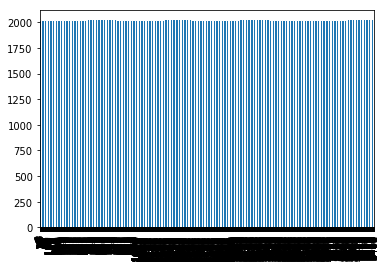

In [16]:
df.Date.plot(kind='bar')

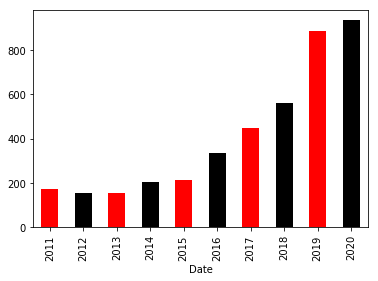

In [17]:
df.groupby(['Date']).mean()['Close'].plot(kind='bar',color=['red','black'])

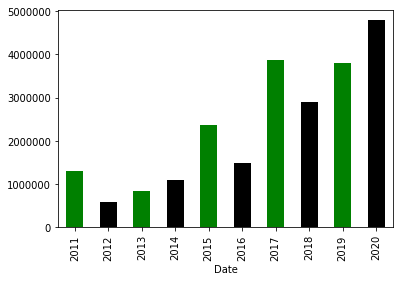

In [18]:
df.groupby(['Date']).mean()['Volume'].plot(kind='bar',color=['green','black'])

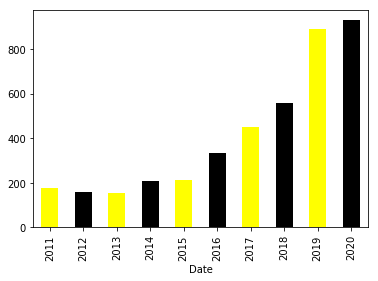

In [19]:
df.groupby(['Date']).mean()['Open'].plot(kind='bar',color=['yellow','black'])

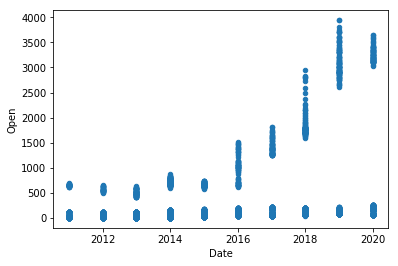

In [20]:
df.plot(kind= 'scatter', x = 'Date', y = 'Open')

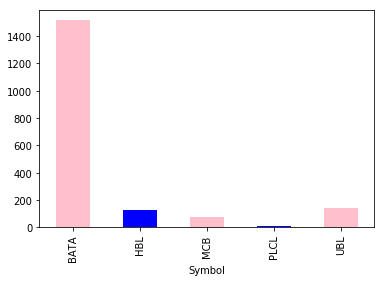

In [21]:
df.groupby(['Symbol']).mean()['Open'].plot(kind='bar',color=['pink','blue'])

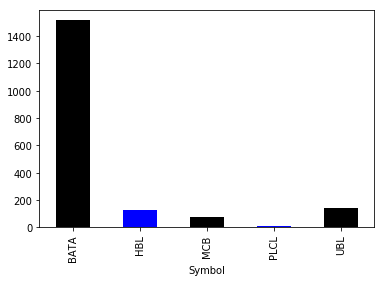

In [22]:
df.groupby(['Symbol']).mean()['Close'].plot(kind='bar',color=['Black','blue'])

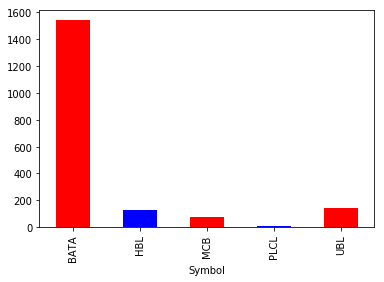

In [23]:
df.groupby(['Symbol']).mean()['High'].plot(kind='bar',color=['red','blue'])

In [24]:
from sklearn import linear_model

In [25]:
close = df.drop(columns = ['Symbol', 'Date', 'Open','High','Low', 'Volume'])
close.head()

,Close
0,675.00
1,670.00
2,656.66
3,646.23
4,642.71


In [26]:
date = df.drop(columns = ['Symbol', 'Open','High','Low', 'Volume','Close'])
date.head()

,Date
0,2011
1,2011
2,2011
3,2011
4,2011


In [27]:
reg = linear_model.LinearRegression()
reg.fit(date,close)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Y = m * X + b (m is coefficient and b is intercept)

In [28]:
reg.coef_

array([[102.48328816]])

In [29]:
reg.intercept_

array([-206173.12412174])

In [30]:
2016*102.48328816 + -206173.12412174

433.1848088200204

In [31]:
p = reg.predict(date)
p

array([[-79.23163613],
       [-79.23163613],
       [-79.23163613],
       ...,
       [843.11795729],
       [843.11795729],
       [843.11795729]])

In [32]:
date['close']=p
date.head()

,Date,close
0,2011,-79.231636
1,2011,-79.231636
2,2011,-79.231636
3,2011,-79.231636
4,2011,-79.231636


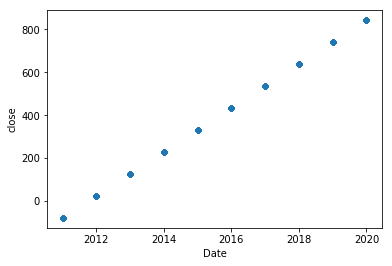